In [74]:
from mintpy.utils import *
import mintpy.utils as mpu
import mintpy.utils.readfile
import mintpy.utils.utils
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [75]:
sns.set_theme()
sns.set_style("ticks")
sns.set_context("paper")
# sns.set_theme(style="white") #, font_scale=0.5)
plt.style.use(['seaborn-paper', 'seaborn-ticks'])
sns.set_color_codes()

In [76]:
matplotlib.rcParams['lines.linewidth']
matplotlib.rcParams['axes.linewidth']
plt.style.available
matplotlib.use("pgf")
matplotlib.rcParams.update({    
    'font.family': 'serif',
    'font.serif': [],       # use latex default serif font
    'font.sans-serif': [],  # use a specific sans-serif font
    'font.monospace': [],   # use a specific sans-serif font
    'text.usetex': True,
    'pgf.rcfonts': False,
    'pgf.texsystem': 'pdflatex',
    'lines.linewidth': 0.7,
    'axes.linewidth': 0.6,
    'axes.unicode_minus': False
})

golden_ratio = (5**.5 - 1) / 2

width  = 3.48761
height = width*golden_ratio
print(width,height)

3.48761 2.155461519504021


In [77]:
mask_data, mask_attr = mpu.readfile.read('/data1/data/sar_rio_dumps/mintpy/maskROI.h5')

In [78]:
mask_attr

{'ALOOKS': '4',
 'ANTENNA_SIDE': '-1',
 'AZIMUTH_PIXEL_SIZE': '62.47099233267028',
 'CENTER_LINE_UTC': '30112.0',
 'DATA_TYPE': 'bool',
 'DATE12': '20171111_20201225',
 'EARTH_RADIUS': '6375135.668508159',
 'END_DATE': '20201225',
 'FILE_LENGTH': '779',
 'LENGTH': '35',
 'FILE_PATH': '/data1/data/sar_rio_dumps/mintpy/maskROI.h5',
 'FILE_TYPE': 'mask',
 'HEADING': '-1.676202658053862e+02',
 'HEIGHT': '704335.8641332268',
 'INCIDENCE_ANGLE': '3.899876128234293e+01',
 'LAT_REF1': '-22.83573284310376',
 'LAT_REF2': '-22.62561722460496',
 'LAT_REF3': '-23.00032312250924',
 'LAT_REF4': '-22.78987460013468',
 'LONG_REF1': '-43.29766906596053',
 'LONG_REF2': '-44.18552664376475',
 'LONG_REF3': '-43.3416520794907',
 'LONG_REF4': '-44.23062879497427',
 'ORBIT_DIRECTION': 'DESCENDING',
 'PLATFORM': 'sen',
 'PRF': '1717.128973878037',
 'PROCESSOR': 'snap',
 'PROJECT_NAME': 'mintpy',
 'P_BASELINE_BOTTOM_HDR': '13.561497688293457',
 'P_BASELINE_TOP_HDR': '13.561497688293457',
 'RANGE_PIXEL_SIZE': '5

In [79]:
plt.imshow(mask_data)

In [80]:
mask_data_temp, mask_attr_temp = mpu.readfile.read('/data1/data/sar_rio_dumps/mintpy/CTR_Rio/maskTempCoh.h5')
plt.imshow(mask_data_temp)

In [81]:
plt.imshow(mask_data*mask_data_temp)
mask_data = mask_data*mask_data_temp

In [82]:
ts_file = '/data1/data/sar_rio_dumps/mintpy/CTR_Rio/timeseries_ERA5_ramp_demErr.h5'

In [83]:
ts_data, ts_attr = mpu.readfile.read(ts_file)

In [84]:
from mintpy.objects import (
    geometryDatasetNames,
    geometry,
    ifgramStack,
    timeseries,
)
from mintpy.utils import ptime, readfile

In [85]:
obj = timeseries(ts_file)

In [86]:
dates, dis = mpu.utils.read_timeseries_yx(0,0, ts_file=ts_file)

input y / x: 0 / 0


In [87]:
ts_attr

{'ALOOKS': '4',
 'ANTENNA_SIDE': '-1',
 'AZIMUTH_PIXEL_SIZE': '62.47099233267028',
 'CENTER_LINE_UTC': '30112.0',
 'DATA_TYPE': 'float32',
 'DATE12': '171111-180110',
 'EARTH_RADIUS': '6375135.668508159',
 'END_DATE': '20201225',
 'FILE_LENGTH': '779',
 'LENGTH': '35',
 'FILE_PATH': '/data1/data/sar_rio_dumps/mintpy/CTR_Rio/timeseries_ERA5_ramp_demErr.h5',
 'FILE_TYPE': 'timeseries',
 'HEADING': '-1.676202658053862e+02',
 'HEIGHT': '704335.8641332268',
 'INCIDENCE_ANGLE': '3.899876128234293e+01',
 'LAT_REF1': '-22.83573284310376',
 'LAT_REF2': '-22.62561722460496',
 'LAT_REF3': '-23.00032312250924',
 'LAT_REF4': '-22.78987460013468',
 'LONG_REF1': '-43.29766906596053',
 'LONG_REF2': '-44.18552664376475',
 'LONG_REF3': '-43.3416520794907',
 'LONG_REF4': '-44.23062879497427',
 'ORBIT_DIRECTION': 'DESCENDING',
 'PLATFORM': 'sen',
 'PRF': '1717.128973878037',
 'PROCESSOR': 'snap',
 'PROJECT_NAME': 'mintpy',
 'P_BASELINE_BOTTOM_HDR': '13.561497688293457',
 'P_BASELINE_TOP_HDR': '13.56149768

In [88]:
plt.imshow(ts_data[1]*mask_data);

In [89]:
ts_cum_sum = (ts_data*mask_data).sum(axis=(1,2))
ts_cum_sum.shape

(94,)

In [90]:
df_ts_data = pd.DataFrame(ts_cum_sum, columns=['Displacement'], index=pd.DatetimeIndex(dates))

In [91]:
df_ts_data = df_ts_data.resample('12D').mean().rename(columns=lambda x: 'Displacement')

In [92]:
a = open('/data1/data/sar_rio_dumps/mintpy/CTR_Rio/exclude_date.txt').readlines()
a.append('20191207\n') #Missing data from S1
a

['20180919\n', '20191207\n']

In [93]:
df_ts_data['Count'] = 1

In [94]:
for i in a:    
    df_ts_data.loc[i[:8]:i[:8]] = 0

In [95]:
df_ts_data['Days'] = 1

In [96]:
df_ts_data.Displacement *= 365
df_ts_data.Displacement /= 12

In [97]:
df_ts_B = pd.DataFrame(ts_cum_sum, columns=['Displacement'], index=pd.DatetimeIndex(dates))
for i in a:    
    df_ts_B.loc[i[:8]:i[:8]] = None
df_ts_B  = df_ts_B['2018-01-01':]
df_ts_B.Displacement *= 365
df_ts_B.Displacement /= 12

In [98]:
df_ts_Q = df_ts_data.resample('D').last()
df_ts_Q = df_ts_Q.bfill(limit=11) \
                 .resample('Q') \
                 .sum()['2018-01-01':]
df_ts_Q['Velocity'] = df_ts_Q.Displacement/df_ts_Q.Count
df_ts_Q['Adj_Displacement'] = df_ts_Q.Velocity*df_ts_Q.Days
# df_ts_Q.Velocity -= df_ts_Q.Velocity.iloc[0]
df_ts_Q['Acceleration'] = df_ts_Q.Velocity.diff()
df_ts_Q

,Displacement,Count,Days,Velocity,Adj_Displacement,Acceleration
2018-03-31,3178.036621,90.0,90.0,35.311518,3178.036621,NaN
2018-06-30,5038.806152,91.0,91.0,55.371496,5038.806152,20.059978
2018-09-30,5782.758789,80.0,92.0,72.284485,6650.172607,16.912989
2018-12-31,6263.892090,92.0,92.0,68.085784,6263.892090,-4.198701
2019-03-31,6775.762207,90.0,90.0,75.286247,6775.762207,7.200463
2019-06-30,7077.884277,91.0,91.0,77.778948,7077.884277,2.492701
2019-09-30,8677.332031,92.0,92.0,94.318826,8677.332031,16.539878
2019-12-31,7909.956543,80.0,92.0,98.874457,9096.450024,4.555630
2020-03-31,6835.047852,91.0,91.0,75.110416,6835.047852,-23.764041
2020-06-30,11796.494141,91.0,91.0,129.631804,11796.494141,54.521388


In [99]:
df_ts_M = df_ts_data.resample('D').last()
df_ts_M = df_ts_M.bfill(limit=11) \
                 .resample('M') \
                 .sum()['2018-01-01':]
df_ts_M['Velocity'] = df_ts_M.Displacement/df_ts_M.Count
df_ts_M['Adj_Displacement'] = df_ts_M.Velocity*df_ts_M.Days
# df_ts_M.Velocity -= df_ts_M.Velocity.iloc[0]
df_ts_M['Acceleration'] = df_ts_M.Velocity.diff()
df_ts_M

,Displacement,Count,Days,Velocity,Adj_Displacement,Acceleration
2018-01-31,665.900391,31.0,31.0,21.480658,665.900391,NaN
2018-02-28,1201.301514,28.0,28.0,42.903625,1201.301514,21.422968
2018-03-31,1310.834595,31.0,31.0,42.284987,1310.834595,-0.618639
2018-04-30,1400.245728,30.0,30.0,46.674858,1400.245728,4.389871
2018-05-31,1791.035156,31.0,31.0,57.775328,1791.035156,11.100470
2018-06-30,1847.525146,30.0,30.0,61.584172,1847.525146,3.808844
2018-07-31,2176.865479,31.0,31.0,70.221467,2176.865479,8.637295
2018-08-31,2432.056152,31.0,31.0,78.453424,2432.056152,8.231957
2018-09-30,1173.837280,18.0,30.0,65.213182,1956.395467,-13.240242
2018-10-31,1882.870483,31.0,31.0,60.737758,1882.870483,-4.475425


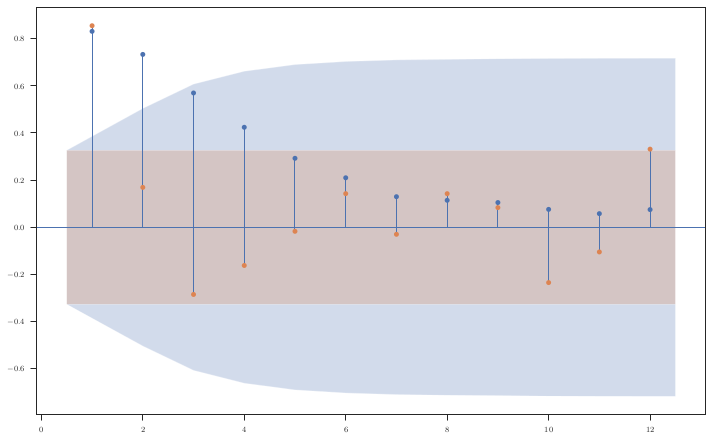

In [131]:
fig = plt.figure(figsize=(12,7.5))
ax = fig.subplots()
plot_acf(df_ts_M.Velocity, zero=False, ax=ax, lags=12)
plot_pacf(df_ts_M.Velocity, zero=False, ax=ax, lags=12)
ax.set_title(None)
fig

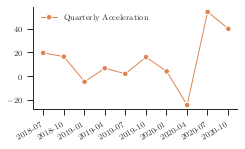

In [101]:
fig = plt.figure(figsize=(width,height))
ax = sns.lineplot(data=df_ts_Q.Acceleration.loc[:'2020-09-30'], marker='o', color='C1');
plt.legend(["Quarterly Acceleration"], loc='upper left')
# ax.set_ylabel(r'Acceleration [cm/year\textsuperscript{2}]')
ax.set_ylabel(None)
sns.despine(trim=False);
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig("pgf/rio_acceleration.pgf", backend='pgf', dpi=600)
fig

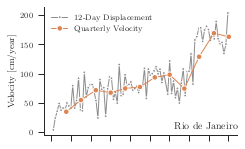

In [127]:
fig = plt.figure(figsize=(width,height))
ax1 = fig.subplots()
sns.lineplot(data=df_ts_B.Displacement, marker='.', color='C7', ax=ax1);
sns.lineplot(data=df_ts_Q.Velocity, marker='o', color='C1', ax=ax1)
ax1.set_ylabel(r'Velocity [cm/year]')
# ax1.set_ylabel(None)
plt.legend(ax1.lines,["12-Day Displacement"]+["Quarterly Velocity"], loc='upper left')
sns.despine(right=True, trim=False)
fig.autofmt_xdate()
# ax1.set_xlabel(None)
ax1.set_xticklabels([])
ax1.text(1.0,0.05,'Rio de Janeiro',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax1.transAxes)
fig.tight_layout()
fig.savefig("pgf/rio_displacement_velocity.pgf", backend='pgf', dpi=600)
fig

In [103]:
stringency = pd.read_csv("/data1/data/stringency_index.csv", index_col=1, parse_dates=True, )
stringency = stringency.T
stringency = stringency[2:] 
stringency.index = pd.DatetimeIndex(stringency.index)

In [104]:
STR = stringency['BRA'].astype(float)
df_ts_Q['Stringency'] = STR.resample('Q') \
                           .mean()['2018-01-01':] 
df_ts_Q['Stringency'].fillna(0, inplace=True)

In [105]:
STR = stringency['BRA'].astype(float)
df_ts_M['Stringency'] = STR.resample('M') \
                           .mean()['2018-01-01':] 
df_ts_M['Stringency'].fillna(0, inplace=True)

In [106]:
country = "Brazil_Seasonal"
GDP = pd.read_csv("/data1/data/GDP.csv" )
GDP.index = pd.DatetimeIndex(GDP.Date)
GDP = GDP.resample('Q').max()
df_ts_Q.loc[:, "GDP"] = GDP[country]

GDP_M = (GDP[country]).resample('M').last()
GDP_M['2020-10-31'] = np.NaN
GDP_M['2020-11-30'] = np.NaN
GDP_M['2020-12-31'] = np.NaN

GDP_Q = GDP[country]

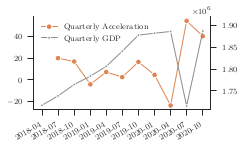

In [107]:
fig = plt.figure(figsize=(width,height))
ax1 = sns.lineplot(data=df_ts_Q.Acceleration.loc[:'2020-09-30'], marker='o', color='C1');
# ax1.set_ylabel(r'Acceleration [cm/year\textsuperscript{2}]')
ax1.set_ylabel(None)
ax2 = plt.twinx()
sns.lineplot(data=df_ts_Q.GDP, ax=ax2, marker='.', color='C7')
# ax2.set_ylabel(r'GDP [\textcurrency]')
ax2.set_ylabel(None)
ax2.set_ylim(top=1920000)
plt.legend(ax1.lines+ax2.lines, ["Quarterly Acceleration"]+["Quarterly GDP"], loc='upper left')
sns.despine(right=False, trim=False);
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig("pgf/rio_acceleration.pgf", backend='pgf', dpi=600)
fig

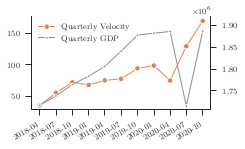

In [108]:
fig = plt.figure(figsize=(width,height))
ax1 = sns.lineplot(data=df_ts_Q.Velocity.loc[:'2020-09-30'], marker='o', color='C1')
# ax1.set_ylabel(r'Velocity [cm/year]')
ax1.set_ylabel(None)
# ax1.set_ylim(bottom=0)
ax2 = plt.twinx()
sns.lineplot(data=df_ts_Q.GDP, ax=ax2, marker='.', color='C7')
# ax2.set_ylabel(r'GDP [\textcurrency]')
ax2.set_ylabel(None)
ax2.set_ylim(top=1920000)
plt.legend(ax1.lines+ax2.lines, ["Quarterly Velocity"]+["Quarterly GDP"], loc='upper left')
sns.despine(right=False, trim=False);
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig("pgf/rio_velocity_GDP.pgf", backend='pgf', dpi=600)
fig

In [109]:
df_ts_M['GDP_naive']      = (df_ts_Q.GDP).resample('M').last()
df_ts_M.GDP_naive         =  df_ts_M.GDP_naive.bfill()
df_ts_M['GDP'] = GDP_M.reset_index() \
                      .interpolate(method='spline', order=3) \
                      .set_index('Date') \
                      .shift(-2)[:'2020-09-30']
df_ts_M 

,Displacement,Count,Days,Velocity,Adj_Displacement,Acceleration,Stringency,GDP_naive,GDP
2018-01-31,665.900391,31.0,31.0,21.480658,665.900391,NaN,0.000000,1717067.2,1.717067e+06
2018-02-28,1201.301514,28.0,28.0,42.903625,1201.301514,21.422968,0.000000,1717067.2,1.724685e+06
2018-03-31,1310.834595,31.0,31.0,42.284987,1310.834595,-0.618639,0.000000,1717067.2,1.731445e+06
2018-04-30,1400.245728,30.0,30.0,46.674858,1400.245728,4.389871,0.000000,1738623.7,1.738624e+06
2018-05-31,1791.035156,31.0,31.0,57.775328,1791.035156,11.100470,0.000000,1738623.7,1.747096e+06
2018-06-30,1847.525146,30.0,30.0,61.584172,1847.525146,3.808844,0.000000,1738623.7,1.756131e+06
2018-07-31,2176.865479,31.0,31.0,70.221467,2176.865479,8.637295,0.000000,1764599.4,1.764599e+06
2018-08-31,2432.056152,31.0,31.0,78.453424,2432.056152,8.231957,0.000000,1764599.4,1.771687e+06
2018-09-30,1173.837280,18.0,30.0,65.213182,1956.395467,-13.240242,0.000000,1764599.4,1.777847e+06
2018-10-31,1882.870483,31.0,31.0,60.737758,1882.870483,-4.475425,0.000000,1783850.7,1.783851e+06


In [110]:
dates_prior = slice('2018-01-01','2019-12-31')
dates_full = slice('2018-01-01','2020-08-31')

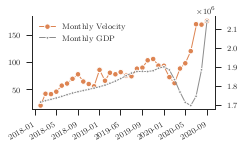

In [120]:
fig = plt.figure(figsize=(width,height))
ax1 = sns.lineplot(data=df_ts_M.Velocity.loc[dates_full], marker='o', color='C1')
# ax1.set_ylabel(r'Velocity [cm/year]')
ax1.set_ylabel(None)
ax2 = plt.twinx()
# sns.lineplot(data=df_ts_M.GDP_naive.loc[dates_full], ax=ax2, marker='.', color='C1')
sns.lineplot(data=df_ts_M.GDP.loc[dates_full], ax=ax2, marker='.', color='C7')
# ax2.set_ylabel(r'GDP [\textcurrency]')
ax2.set_ylabel(None)
# ax2.set_ylim(top=1350000)
plt.legend(ax1.lines+ax2.lines, ["Monthly Velocity"]+["Monthly GDP"], loc='upper left')
sns.despine(right=False, trim=False);
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig("pgf/rio_velocity_GDP_monthly.pgf", backend='pgf', dpi=600)
fig

In [112]:
import statsmodels.api as sm
X_var = ['GDP']
X = df_ts_M.loc[dates_prior, X_var]
y = df_ts_M.Velocity[dates_prior]
X = sm.add_constant(X)
# X['trend'] = range(1,len(X)+1)
# Note the difference in argument order
model = sm.OLS(y, X).fit(cov_type='HAC',cov_kwds={'maxlags':12})
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Velocity   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.81
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           4.30e-09
Time:                        09:05:33   Log-Likelihood:                -88.749
No. Observations:                  24   AIC:                             181.5
Df Residuals:                      22   BIC:                             183.9
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -484.2324     60.459     -8.009      0.000    -602.730    -365.734
GDP            0.0003    3.3e-05      9.317      0.000       0.000       0.000
==============================================================================
Omnibus:                        0.048   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.065
Skew:                           0.016   Prob(JB):                        0.968
Kurtosis:                       2.747   Cond. No.                     5.62e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 12 lags and without small sample correction
[2] The condition number is large, 5.62e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
import statsmodels.api as sm
X_var = ['GDP']
X = df_ts_M.loc[dates_full, X_var]
y = df_ts_M.Velocity[dates_full]
X = sm.add_constant(X)
# X['trend'] = range(1,len(X)+1)
# Note the difference in argument order
model = sm.OLS(y, X).fit(cov_type='HAC',cov_kwds={'maxlags':12})
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Velocity   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     8.615
Date:                Fri, 05 Mar 2021   Prob (F-statistic):            0.00634
Time:                        09:05:33   Log-Likelihood:                -153.71
No. Observations:                  32   AIC:                             311.4
Df Residuals:                      30   BIC:                             314.4
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -309.4051    140.137     -2.208      0.027    -584.069     -34.741
GDP            0.0002   7.38e-05      2.935      0.003     7.2e-05       0.000
==============================================================================
Omnibus:                       21.949   Durbin-Watson:                   0.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.808
Skew:                           1.818   Prob(JB):                     2.04e-07
Kurtosis:                       6.145   Cond. No.                     3.89e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 12 lags and without small sample correction
[2] The condition number is large, 3.89e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
import statsmodels.api as sm
X_var = ['GDP','Stringency']
X = df_ts_M.loc[dates_full, X_var]
y = df_ts_M.Velocity[dates_full]
X = sm.add_constant(X)
# X['trend'] = range(0,len(X))
# Note the difference in argument order
model = sm.OLS(y, X).fit(cov_type='HAC',cov_kwds={'maxlags':12})
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Velocity   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     135.9
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.86e-15
Time:                        09:05:33   Log-Likelihood:                -131.59
No. Observations:                  32   AIC:                             269.2
Df Residuals:                      29   BIC:                             273.6
Df Model:                           2                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -285.4989     79.326     -3.599      0.000    -440.975    -130.023
GDP            0.0002   4.37e-05      4.504      0.000       0.000       0.000
Stringency     0.9027      0.066     13.616      0.000       0.773       1.033
==============================================================================
Omnibus:                        2.153   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.032
Skew:                           0.344   Prob(JB):                        0.597
Kurtosis:                       3.549   Cond. No.                     3.89e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 12 lags and without small sample correction
[2] The condition number is large, 3.89e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
import statsmodels.api as sm
X_var = ['GDP','Stringency']
dates = slice('2018-03-31','2020-09-30')
X = df_ts_Q.loc[dates, X_var]
y = df_ts_Q.Velocity[dates]
X = sm.add_constant(X)
# X['trend'] = range(1,len(X)+1)
# Note the difference in argument order
model = sm.OLS(y, X).fit(cov_type='HAC',cov_kwds={'maxlags':4})
X_all = df_ts_Q.loc[dates, X_var]
X_all.Stringency = 0.0
X_all = sm.add_constant(X_all)
# X_all['trend'] = range(1,len(X)+1)
predictions = model.predict(X_all) # make the predictions by the model
# Print out the statistics
model.summary()

/home/tvanzyl/anaconda3/envs/mintpy/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Velocity   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     188.5
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.87e-07
Time:                        09:05:33   Log-Likelihood:                -42.805
No. Observations:                  11   AIC:                             91.61
Df Residuals:                       8   BIC:                             92.80
Df Model:                           2                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -344.7206     66.450     -5.188      0.000    -474.961    -214.481
GDP            0.0002   3.71e-05      6.197      0.000       0.000       0.000
Stringency     1.0190      0.054     18.903      0.000       0.913       1.125
==============================================================================
Omnibus:                       11.020   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                5.540
Skew:                          -1.560   Prob(JB):                       0.0626
Kurtosis:                       4.532   Cond. No.                     4.97e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
[2] The condition number is large, 4.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
df_ts_Q["Prediction"] = predictions
df_ts_Q["Residual_Velocity"] = (df_ts_Q.Velocity-df_ts_Q.Prediction)

In [117]:
df_ts_Q.loc['20180101':'20191231',['Velocity','Adj_Displacement','Acceleration','GDP','Residual_Velocity']].corr()

,Velocity,Adj_Displacement,Acceleration,GDP,Residual_Velocity
Velocity,1.000000,0.999627,-0.158453,0.945402,0.833109
Adj_Displacement,0.999627,1.000000,-0.153921,0.942737,0.836724
Acceleration,-0.158453,-0.153921,1.000000,-0.271122,0.224920
GDP,0.945402,0.942737,-0.271122,1.000000,0.607362
Residual_Velocity,0.833109,0.836724,0.224920,0.607362,1.000000


In [118]:
df_ts_Q.loc['20180101':'20200930',['Velocity','Adj_Displacement','Acceleration','GDP','Residual_Velocity','Stringency']].corr()

,Velocity,Adj_Displacement,Acceleration,GDP,Residual_Velocity,Stringency
Velocity,1.000000,0.999869,0.670522,0.423697,0.901577,0.835712
Adj_Displacement,0.999869,1.000000,0.667385,0.428888,0.898953,0.830883
Acceleration,0.670522,0.667385,1.000000,-0.426890,0.879796,0.723561
GDP,0.423697,0.428888,-0.426890,1.000000,-0.009873,-0.010642
Residual_Velocity,0.901577,0.898953,0.879796,-0.009873,1.000000,0.927657
Stringency,0.835712,0.830883,0.723561,-0.010642,0.927657,1.000000


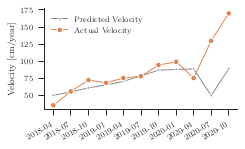

In [119]:
fig = plt.figure(figsize=(width,height))
ax = sns.lineplot(data=df_ts_Q.Prediction, marker='.', color='C7')
sns.lineplot(data=df_ts_Q.Velocity.loc[dates], marker='o', color='C1', ax=ax)
ax.set_ylabel(r'Velocity [cm/year]')
plt.legend(["Predicted Velocity","Actual Velocity"], loc='upper left')
sns.despine(trim=False);
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig("pgf/rio_predicted_velocity.pgf", backend='pgf', dpi=600)
fig